<a href="https://colab.research.google.com/github/PyBlin/Study/blob/main/PyML/Chapter2_ScikitLearn/Chap2_6_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.Kaggle Titanic

## 6.1 데이터 탐색

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('./train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# 학습 데이터셋 정보
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 판다스의 object 타입은 string으로 봐도 무방합니다.

In [20]:
# 결측치를 Age는 평균값으로, 나머지는 'N'값으로 변경
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print(f"Data set's Null count : \n{titanic_df.isnull().sum()}")

Data set's Null count : 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [21]:
print(f"Sex : \n{titanic_df['Sex'].value_counts()}\n")
print(f"Cabin : \n{titanic_df['Cabin'].value_counts()}\n")
print(f"Embarked : \n{titanic_df['Embarked'].value_counts()}")

Sex : 
male      577
female    314
Name: Sex, dtype: int64

Cabin : 
N              687
C23 C25 C27      4
B96 B98          4
G6               4
F2               3
              ... 
C46              1
B30              1
D50              1
C106             1
E63              1
Name: Cabin, Length: 148, dtype: int64

Embarked : 
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


* Cabin의 경우 앞의 알파벳이 중요해 보입니다. 아마 선실 등급과 연관이 있습니다.
* Cabin의 앞 문자만 추출해봅시다.

In [22]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [23]:
# 성별에 따른 생존자 수
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

* Survived 0은 사망, 1은 생존입니다.
* 남자가 더 많이 사망했습니다.

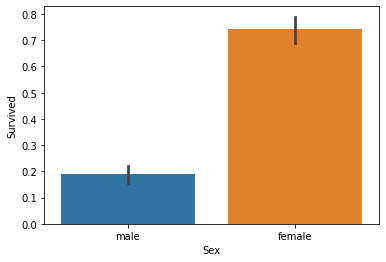

In [24]:
# seaborn barplot
sns.barplot('Sex', 'Survived', data=titanic_df);

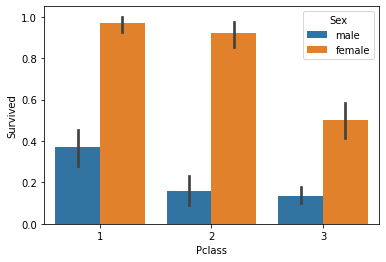

In [25]:
# 객실 등급별 그래프
sns.barplot('Pclass', 'Survived', hue='Sex', data=titanic_df);

* 여성의 경우 3등실의 생존률이 낮습니다.
* 남성의 경우 1등실의 생존률이 높습니다.

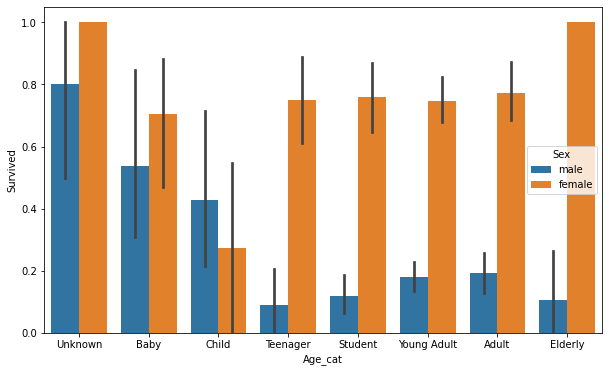

In [26]:
# 나이 그래프 : 범위별로 분류하여 카테고리값을 할당
def get_category(age):
    cat = ''
    if age <= 1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

# figure 크게 설정
plt.figure(figsize=(10, 6))

# x축 값을 순차적으로 표시
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 
               'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda : get_category() 함수를 반환값으로 지정
# get_category(X) : 입력값으로 'Age' 컬럼을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot('Age_cat', 'Survived', hue='Sex', 
            data=titanic_df, order=group_names)
titanic_df.drop("Age_cat", axis=1, inplace=True)

* 여성 생존률의 경우 Elderly가 높고, Child가 낮습니다.
* 성별, 나이, 객실등급이 생존을 좌우하는 것을 확인하였습니다.

In [27]:
# 남아있는 문자열을 숫자형으로 변환 : Label Encoder
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


* Sex, Cabin, Embarked의 값이 숫자로 바뀌었습니다.
* 지금까지 가공한 피처를 함수로 정리하여 쉽게 재사용할 수 있도록 만들어 봅시다.

In [28]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def titanic_fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# ML 알고리즘에 불필요한 속성 제거
def titanic_drop(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# label encoding
def titanic_le(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 위에서 설정한 데이터 전처리 함수 종합
def transform_features(df):
    df = titanic_fillna(df)
    df = titanic_drop(df)
    df = titanic_le(df)
    return df

## 6.2 Modeling

* 이제 다시 원본 데이터를 로딩하여 적용해봅시다.
* Survived 속성은 레이블이므로 별도로 분리하여 클래스 결정값 데이터셋으로 만듭니다.
* 그리고 Survived 속성을 drop하여 피처 데이터셋을 만듭니다.
* 이렇게 생성된 피처 데이터셋에 `transform_features()`를 적용해 봅시다.

In [29]:
# 원본 데이터를 다시 로드하고 피처 데이터셋과 레이블 데이터셋 추출
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [30]:
# 별도의 테스트 데이터셋 추출
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, 
                                                    random_state=11)

In [31]:
# train and predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# sklearn classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# Decision Tree Classifier Modeling
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f"DT acc : {accuracy_score(y_test, dt_pred)*100:.2f} %")

# Random Forest Classifier Modeling
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f"RF acc : {accuracy_score(y_test, rf_pred)*100:.2f} %")

# Logistic Regression Classifier Modeling
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f"LR acc : {accuracy_score(y_test, lr_pred)*100:.2f} %")

DT acc : 78.77 %
RF acc : 85.47 %
LR acc : 84.92 %


* 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수는 없습니다.

## 6.3 Cross Validation Modeling

### 6.3.1 KFold CV

In [32]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # Kfold 객체를 생성하고 폴드 수만큼 예측 결과를 리스트에 저장
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold CV
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):

        # X_titanic_df 에서 CV 별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # clf 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f"CV {iter_count} 정확도 : {accuracy*100:.2f} %")

    # 5개 폴드에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print(f"평균 정확도 : {mean_score*100:.2f} %")

# exec_kfold 호출
exec_kfold(dt_clf)

CV 0 정확도 : 75.42 %
CV 1 정확도 : 78.09 %
CV 2 정확도 : 78.65 %
CV 3 정확도 : 76.97 %
CV 4 정확도 : 82.02 %
평균 정확도 : 78.23 %


* KFold CV의 평균 정확도는 78.23 % 입니다.

### 6.3.2 cross_val_score() API

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print(f"CV {iter_count} 정확도 : {accuracy*100:.2f} %")
print(f"평균 정확도 : {np.mean(scores)*100:.2f} %")

CV 0 정확도 : 74.30 %
CV 1 정확도 : 77.53 %
CV 2 정확도 : 79.21 %
CV 3 정확도 : 78.65 %
CV 4 정확도 : 84.27 %
평균 정확도 : 78.79 %


* cross_val_score() API는 Stratified KFold를 이용해 폴드셋을 분할하기 때문에 KFold의 평균 정확도와 약간의 차이가 발생합니다.

### 6.3.3 Grid Search CV

* 하이퍼 파라미터 : max_depth, min_samples_split, min_samples_leaf

In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 4, 10], 'min_samples_split':[2, 3, 5], 
              'min_samples_leaf':[1, 5, 8]}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, 
                         scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print(f"Grid Search CV 최적 하이퍼 파라미터 : {grid_dclf.best_params_}")
print(f"Grid Search CV 최고 정확도 : {grid_dclf.best_score_*100:.2f} %")

# 최적 하이퍼 파라미터로 학습된 Estimator 추출
best_dclf = grid_dclf.best_estimator_

# 모델링
gscv_pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, gscv_pred)
print(f"테스트셋에서의 DT 정확도 : {accuracy*100:.2f} %")

Grid Search CV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Grid Search CV 최고 정확도 : 79.92 %
테스트셋에서의 DT 정확도 : 87.15 %


* 하이퍼 파라미터 변경 전보다 약 8% 정도 정확도가 향상됐습니다.
* 사실, 일반적으로 하이퍼 파라미터를 튜닝하더라도 이 정도 수준으로 증가하기는 매우 어렵습니다.
* 테스트용 데이터셋이 작기 때문에 수치상으로 예측 성능이 많이 증가한 것처럼 보이는 겁니다.